In [5]:
# Task 2: Microsoft (MSFT) Stock Price Prediction

In [6]:
#Problem Statement:
#Use historical stock data to predict future closing prices for a company like Microsoft (MSFT).

In [7]:
#pip install yfinance scikit-learn matplotlib pandas

In [8]:
#Dataset Loading and Preprocessing:
#Used yfinance to fetch real-time MSFT data for the past years.
#Preprocessed the data by keeping only the "Close" column.

In [9]:
import yfinance as yf

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
Microsoft = yf.download('MSFT',start='2022-01-01', end='2023-12-31')

C:\Users\DELL\AppData\Local\Temp\ipykernel_1636\1733741733.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Microsoft = yf.download('MSFT',start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [15]:
print(Microsoft.head())

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-01-03  325.038055  328.193765  320.212247  325.620654  28865100
2022-01-04  319.464600  325.475014  316.658432  325.115724  32674300
2022-01-05  307.201019  316.609890  306.812630  316.405962  40054300
2022-01-06  304.773529  309.453695  302.452855  304.064698  39646100
2022-01-07  304.928894  307.317515  301.093482  305.035688  32720000


In [16]:
Microsoft['Tomorrow_Close'] = Microsoft['Close'].shift(-1)
Microsoft = Microsoft.dropna()

In [17]:
features = ['Open', 'High', 'Low','Volume']
X = Microsoft[features]
y = Microsoft['Tomorrow_Close']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)       
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"RMSE: {rmse: 2f}")
print(f"R^2 Score: {r2: 4f}")

RMSE:  16.450693
R^2 Score:  0.488675


In [23]:
#Data Visualization and Exploration:
#Plotted the closing price trend over time.
#This helps us understand general trends, e.g., upward or downward movement.

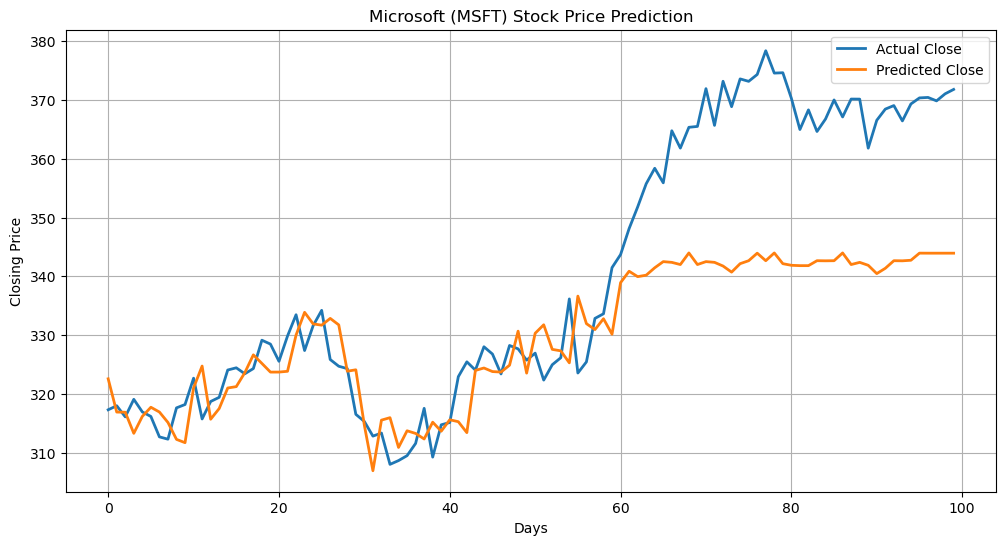

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close', linewidth=2)
plt.plot(y_pred, label='Predicted Close', linewidth=2)
plt.title("Microsoft (MSFT) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#Final Insights:
#The model gives a rough estimate of stock movement but not highly accurate for long-term or high-stakes prediction.
#R^2 score may be low due to market volatility and Linear Regression being a simple model.
#For better performance, time-series models like LSTM or ARIMA could be explored.